In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

## Data Read-in and Setup

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df_ml = pd.read_csv('/content/drive/MyDrive/ST4248 Project/dataset/hotel_dataset.csv')

df_ml1 = copy.deepcopy(df_ml)

In [16]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117082 entries, 0 to 117081
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117082 non-null  object 
 1   is_canceled                     117082 non-null  int64  
 2   lead_time                       117082 non-null  int64  
 3   arrival_date_year               117082 non-null  int64  
 4   arrival_date_month              117082 non-null  object 
 5   arrival_date_week_number        117082 non-null  int64  
 6   arrival_date_day_of_month       117082 non-null  int64  
 7   stays_in_weekend_nights         117082 non-null  int64  
 8   stays_in_week_nights            117082 non-null  int64  
 9   adults                          117082 non-null  int64  
 10  children                        117082 non-null  int64  
 11  babies                          117082 non-null  int64  
 12  meal            

## Label Encoder

In [17]:
from sklearn.preprocessing import LabelEncoder

def encode_dataframe(df):
    """
    Automatically encode a dataframe that has both continuous and categorical features.
    Uses a combination of Label Encoding and One-Hot Encoding.
    Returns the encoded dataframe.
    """
    # separate the categorical and numerical features
    categorical_features = df.select_dtypes(include=['object', "bool"]).columns
    
    # encode categorical features with Label Encoding
    label_encoder = LabelEncoder()
    for feature in categorical_features:
        df[feature] = label_encoder.fit_transform(df[feature])
    
    return df

In [18]:
df_ml = encode_dataframe(df_ml)

In [7]:
pd.unique(df_ml.deposit_type)

array([0, 2, 1])

In [9]:
df_ml.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,total_of_special_requests,reservation_status,reservation_status_date,num.guests,pre.cancel.ratio,has.minor,stays,is_company_paid,is_holiday_season,get_reserved
0,1,1,0,7,2015,5,27,1,0,1,...,0,1,120,1,NaN,0,1,0,1,0
1,2,1,0,13,2015,5,27,1,0,1,...,0,1,120,1,NaN,0,1,0,1,1
2,3,1,0,14,2015,5,27,1,0,2,...,1,1,121,2,NaN,0,2,0,1,1
3,4,1,0,14,2015,5,27,1,0,2,...,1,1,121,2,NaN,0,2,0,1,1
4,5,1,0,0,2015,5,27,1,0,2,...,0,1,121,2,NaN,0,2,0,1,1


In [20]:
# Sanity check

from collections import Counter
class_counts = Counter(df_ml.is_canceled)

# Print the class counts
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

0: 73108
1: 43974


## Drop the Feautures

In [21]:
X = df_ml.drop(["is_canceled"], axis = 1)

In [22]:
# Drop due to multi-collinearity
X = X.drop(["stays_in_weekend_nights", "stays_in_week_nights"], axis = 1)

In [23]:
# Drop due to many NAs
X = X.drop(["pre.cancel.ratio"], axis = 1)

In [24]:
# Drop due to locations/levels
X = X.drop(["agent", "company", "country"], axis = 1)

In [25]:
# Prevent Data Leakage/Data not avaliable prior to cancellation occur
X = X.drop(["reservation_status_date", "reservation_status"], axis = 1)

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117082 entries, 0 to 117081
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117082 non-null  int64  
 1   lead_time                       117082 non-null  int64  
 2   arrival_date_year               117082 non-null  int64  
 3   arrival_date_month              117082 non-null  int64  
 4   arrival_date_week_number        117082 non-null  int64  
 5   arrival_date_day_of_month       117082 non-null  int64  
 6   adults                          117082 non-null  int64  
 7   children                        117082 non-null  int64  
 8   babies                          117082 non-null  int64  
 9   meal                            117082 non-null  int64  
 10  market_segment                  117082 non-null  int64  
 11  distribution_channel            117082 non-null  int64  
 12  is_repeated_gues

In [27]:
y = df_ml.loc(axis = 1)["is_canceled"]

## Do MI test

In [ ]:
discrete_variable = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 
                     18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29]

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information between each feature in X and y
mutual_info = mutual_info_classif(X, y, random_state=42, discrete_features = discrete_variable)

In [ ]:
feature_names = X.columns

In [ ]:
mi_df = pd.DataFrame({'feature': X.columns, 'mi_score': mutual_info}).sort_values(by='mi_score', ascending=False)

In [ ]:
mi_df

,feature,mi_score
18,deposit_type,0.131840
1,lead_time,0.082919
21,adr,0.079104
13,previous_cancellations,0.041442
29,get_reserved,0.038092
23,total_of_special_requests,0.037544
10,market_segment,0.036692
22,required_car_parking_spaces,0.030416
16,assigned_room_type,0.020606
17,booking_changes,0.019513


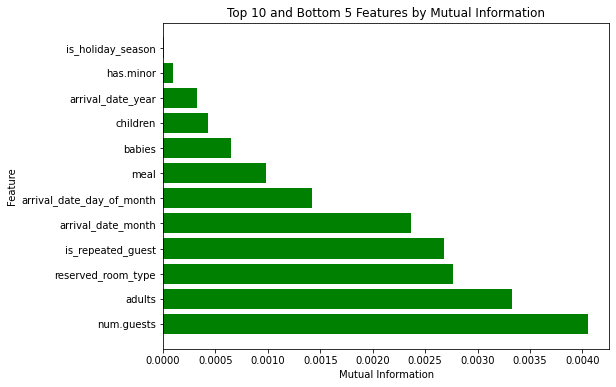

In [ ]:
# select top 10 and bottom 5 features
bottom_features = mi_df.tail(12)

# plot horizontal bar chart with most important feature on top
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(bottom_features['feature'], bottom_features['mi_score'], color='green')
ax.set_xlabel('Mutual Information')
ax.set_ylabel('Feature')
ax.set_title('Top 10 and Bottom 5 Features by Mutual Information')
plt.show()

In [28]:
to_drop = ["is_holiday_season", "has.minor", "arrival_date_year", "children", "babies", 
           "meal", "arrival_date_day_of_month"]

In [29]:
X_cleaned = X.drop(to_drop, axis = 1)

In [30]:
X_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117082 entries, 0 to 117081
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117082 non-null  int64  
 1   lead_time                       117082 non-null  int64  
 2   arrival_date_month              117082 non-null  int64  
 3   arrival_date_week_number        117082 non-null  int64  
 4   adults                          117082 non-null  int64  
 5   market_segment                  117082 non-null  int64  
 6   distribution_channel            117082 non-null  int64  
 7   is_repeated_guest               117082 non-null  int64  
 8   previous_cancellations          117082 non-null  int64  
 9   previous_bookings_not_canceled  117082 non-null  int64  
 10  reserved_room_type              117082 non-null  int64  
 11  assigned_room_type              117082 non-null  int64  
 12  booking_changes 

In [31]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ["lead_time", "previous_cancellations", "previous_bookings_not_canceled", 
                  "adults", "booking_changes", "days_in_waiting_list", "adr", "required_car_parking_spaces", 
                  "total_of_special_requests", "adults", "num.guests", "stays"]

def normalise_cols(df, columns):
    scaler = StandardScaler()
    df_norm = df.copy()
    df_norm[columns] = scaler.fit_transform(df_norm[columns])
    return df_norm

X_normalised = normalise_cols(X_cleaned, numerical_cols)

In [32]:
df_ml_final = pd.concat([X_normalised.reset_index(drop=True), y.reset_index(drop=True)], axis = 1)

## Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=0.3,random_state=42)

In [34]:
df_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis = 1)
df_test = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis = 1)

## Write to file

In [35]:
df_train.to_csv('/content/drive/MyDrive/ST4248 Project/dataset/train_normalised.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/ST4248 Project/dataset/test_normalised.csv', index=False)